# HR Analytics Project- Understanding the Attrition in HR

How does Attrition affect companies? and how does HR Analytics help in analyzing attrition? we will write the code and try to understand the process step by step.

In [1]:
from IPython.display import Image
Image(url="https://www.valamis.com/wp-content/uploads/2022/09/hr-analytics.png")

In [48]:
import pandas as pd
import requests
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [49]:
#reading the csv files and listing the datas
df_attr= pd.read_csv(r"C:\Users\Premium\Downloads\attrition.csv")

In [50]:
df_attr.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [7]:
df_attr.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


In [8]:
print("The shape of data frame:", df_attr.shape)

The shape of data frame: (1470, 35)


There are 1470 Rows and 35 Coloumns

In [10]:
print("Column labels in the dataset in column order:",df_attr.columns)

Column labels in the dataset in column order: Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')


In [11]:
df_attr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

There are 26 Numerical Attributes in the dataset.
and we have 9 Categorical Attributes.

# Checking for Missing Values

In [12]:
df_attr.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

There are no NULL values in our dataset.

<AxesSubplot:>

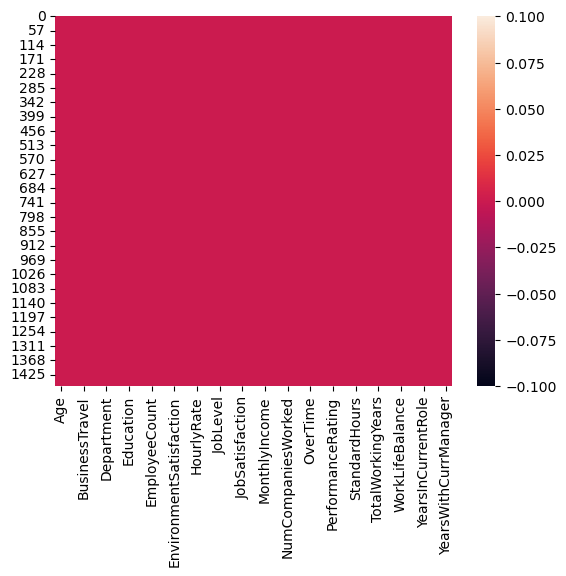

In [13]:
import seaborn as sns
sns.heatmap(df_attr.isnull())

Thus we can see clearly that there are no NULL values in our Dataset

# Exploratory Data Analysis

DESCRIPTIVE ANALYSIS ON NUMERICAL ATTRIBUTES

In [15]:
df_attr.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [ ]:
The values of mean and 50% percentile are aproximately same.


DESCRIPTIVE ANALYSIS ON CATEGORICAL ATTRIBUTES

In [16]:
df_attr.describe(include="O")

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


# VISUALIZING THE EMPLOYEE ATTRITION RATE.

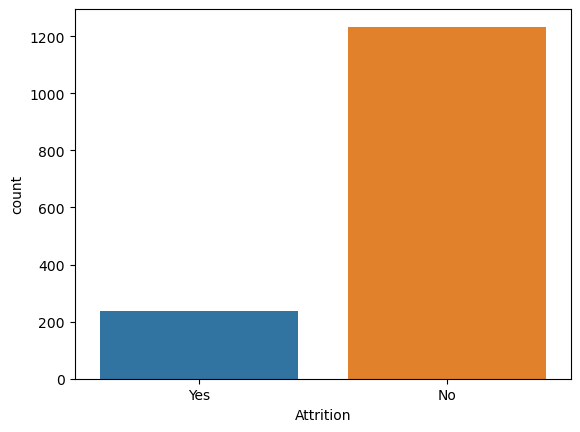

In [23]:
#Let's check the proportion of each type  of attrition
sns.countplot(x='Attrition',data=df_attr)
plt.show()

In [20]:
attrition_rate = df_attr["Attrition"].value_counts()

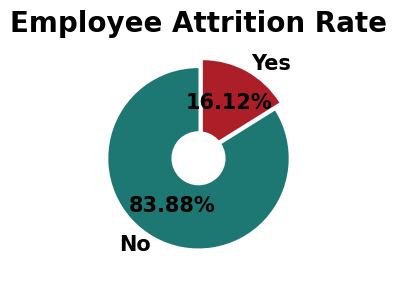

In [21]:
plt.subplot(1,2,2)
plt.pie(attrition_rate, labels=["No","Yes"], autopct="%.2f%%", textprops={"fontweight":"black","size":15},
        colors = ["#1d7874","#AC1F29"],explode=[0,0.1],startangle=90)
center_circle = plt.Circle((0, 0), 0.3, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)
plt.title("Employee Attrition Rate",fontweight="black",size=20,pad=10)
plt.show()

Inference:

The employee attrition rate of this organization is 16.12%.

According to experts in the field of Human Resources, says that the attrition rate 4% to 6% is normal in organization.

So we can say the attrition rate of the organization is at a dangerous level.

Therefore the organization should take measures to reduce the attrition rate.

# ANALYZING EMPLOYEE ATTRITION BY GENDER.

([<matplotlib.patches.Wedge at 0x2056cd36940>,
 [Text(-1.0461621424642782, -0.3399187721714579, 'Male'),
  Text(1.1412677570604886, 0.37082058558570047, 'Female')],
 [Text(-0.5706338958896062, -0.18541023936624976, '60%'),
  Text(0.6657395249519517, 0.21631200825832528, '40%')])

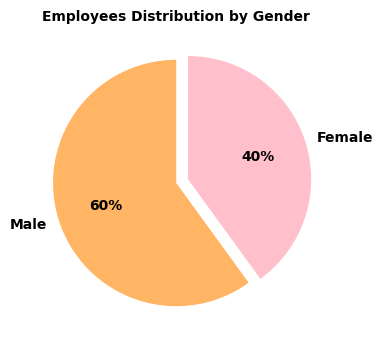

In [29]:
#Visualization 
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
gender_attrition =df_attr["Gender"].value_counts()
plt.title("Employees Distribution by Gender",fontweight="black",size=10)
plt.pie(gender_attrition, autopct="%.0f%%",labels=gender_attrition.index,textprops=({"fontweight":"black","size":10}),
        explode=[0,0.1],startangle=90,colors= ["#ffb563","#FFC0CB"])




The number of male employees in the organization accounts for a higher proportion than female employees by more than 20%.

Male employees are leaving more from the organization compared to female employees.

# Analysing Attrition by age

Text(0.5, 1.0, 'Employee Distribution by Age')

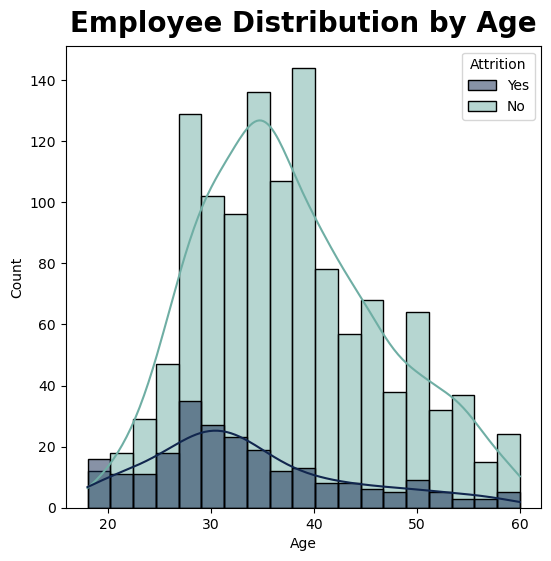

In [24]:
#Visualization to show Employee Distribution by Age.
plt.figure(figsize=(13.5,6))
plt.subplot(1,2,1)
sns.histplot(x="Age",hue="Attrition",data=df_attr,kde=True,palette=["#11264e","#6faea4"])
plt.title("Employee Distribution by Age",fontweight="black",size=20,pad=10)

Most of the emloyees are between age 30 to 40.

We can clearly observe a trend that as the age is increasing the attrition is decreasing.

# ANALYZING EMPLOYEE  BY JOB ROLES.

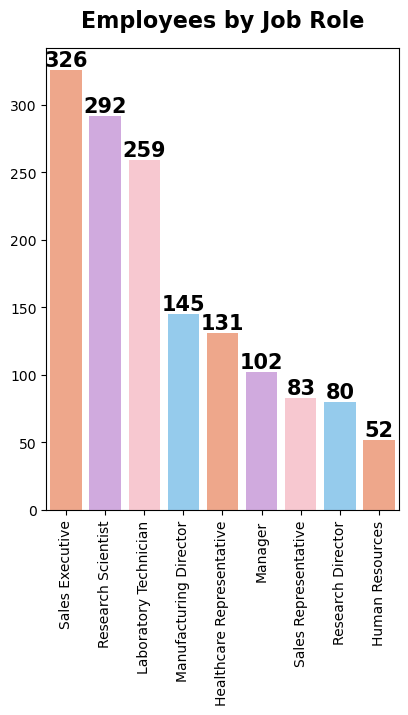

In [31]:
##Visualization to show Total Employees by JobRole.
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
value_1 = df_attr["JobRole"].value_counts()
sns.barplot(x=value_1.index.tolist(), y=value_1.values,palette = ["#FFA07A", "#D4A1E7", "#FFC0CB","#87CEFA"])
plt.title("Employees by Job Role",fontweight="black",pad=15,size=16)
plt.xticks(rotation=90)
for index, value in enumerate(value_1.values):
    plt.text(index,value,value,ha="center",va="bottom",fontweight="black",size=15)

Most employees is working as Sales executive, Research Scientist or Laboratory Technician in this organization.



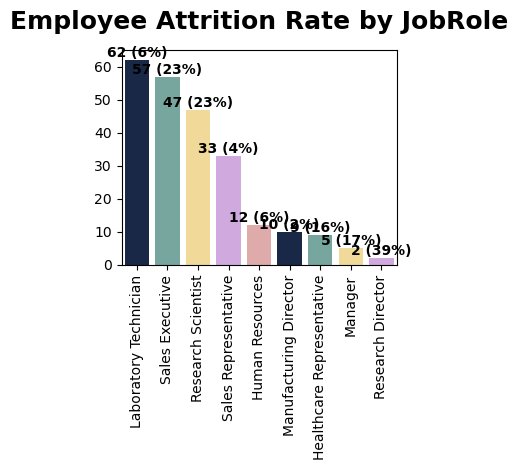

In [33]:
#Visualization to show Attrition Rate by JobRole.
plt.subplot(1,2,2)
new_df = df_attr[df_attr["Attrition"]=="Yes"]
value_2 = new_df["JobRole"].value_counts()
attrition_rate = np.floor((value_2/value_1)*100).values
sns.barplot(x=value_2.index.tolist(), y=value_2.values,palette=["#11264e","#6faea4","#FEE08B","#D4A1E7","#E7A1A1"])
plt.title("Employee Attrition Rate by JobRole",fontweight="black",pad=15,size=18)
plt.xticks(rotation=90)
for index,value in enumerate(value_2.values):
    plt.text(index,value, str(value)+" ("+str(int(attrition_rate[index]))+"%)",ha="center",va="bottom",
             fontweight="black",size=10)
plt.tight_layout()
plt.show()

Highest attrition rates are in sector of Research Director, Sales Executive, Research Scientist.

# ANALYZING EMPLOYEE ATTRITION BY JOB LEVEL.

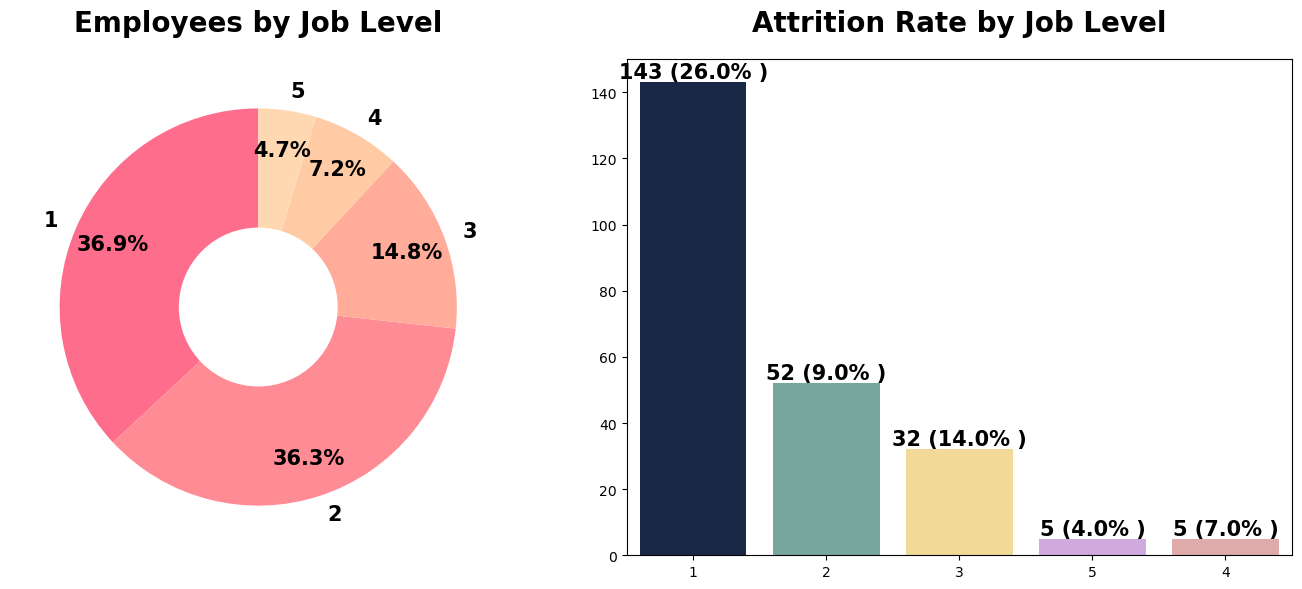

In [34]:
#Visualization to show Total Employees by Job Level.

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
value_1 = df_attr["JobLevel"].value_counts()
plt.title("Employees by Job Level", fontweight="black", size=20, pad=20)
plt.pie(value_1.values, labels=value_1.index, autopct="%.1f%%",pctdistance=0.8,startangle=90,
        colors=['#FF6D8C', '#FF8C94', '#FFAC9B', '#FFCBA4',"#FFD8B1"],textprops={"fontweight":"black","size":15})
center_circle = plt.Circle((0, 0), 0.4, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)
  
#Visualization to show Attrition Rate by JobLevel.

plt.subplot(1,2,2)
new_df = df_attr[df_attr["Attrition"]=="Yes"]
value_2 = new_df["JobLevel"].value_counts()
attrition_rate = np.floor((value_2/value_1)*100).values
sns.barplot(x=value_2.index,y=value_2.values,order=value_2.index,palette=["#11264e","#6faea4","#FEE08B","#D4A1E7","#E7A1A1"])
plt.title("Attrition Rate by Job Level",fontweight="black",size=20,pad=20)
for index,value in enumerate(value_2):
    plt.text(index,value,str(value)+" ("+str(attrition_rate[index])+"% )",ha="center",va="bottom",
             size=15,fontweight="black")
plt.tight_layout()
plt.show()


here 1---> Entry level

2-----> junior level

3----->mid level

4-----> serior level

5-----> executive level

Most of the employees in the organization are at Entry Level or Junior Level.

Highest Attrition is at the Entry Level.

As the level increases the attrition rate decreases.

# ANALYZING EMPLOYEE ATTRITION BY TOTAL WORKING EXPERIENCE

In [36]:
# Define the bin edges for the groups
bin_edges = [0, 5, 10, 20, 50]

# Define the labels for the groups
bin_labels = ['0-5 years', '5-10 years', '10-20 years', "20+ years"]

# Cut the DailyRate column into groups
df_attr["TotalWorkingYearsGroup"] = pd.cut(df_attr['TotalWorkingYears'], bins=bin_edges, labels=bin_labels)

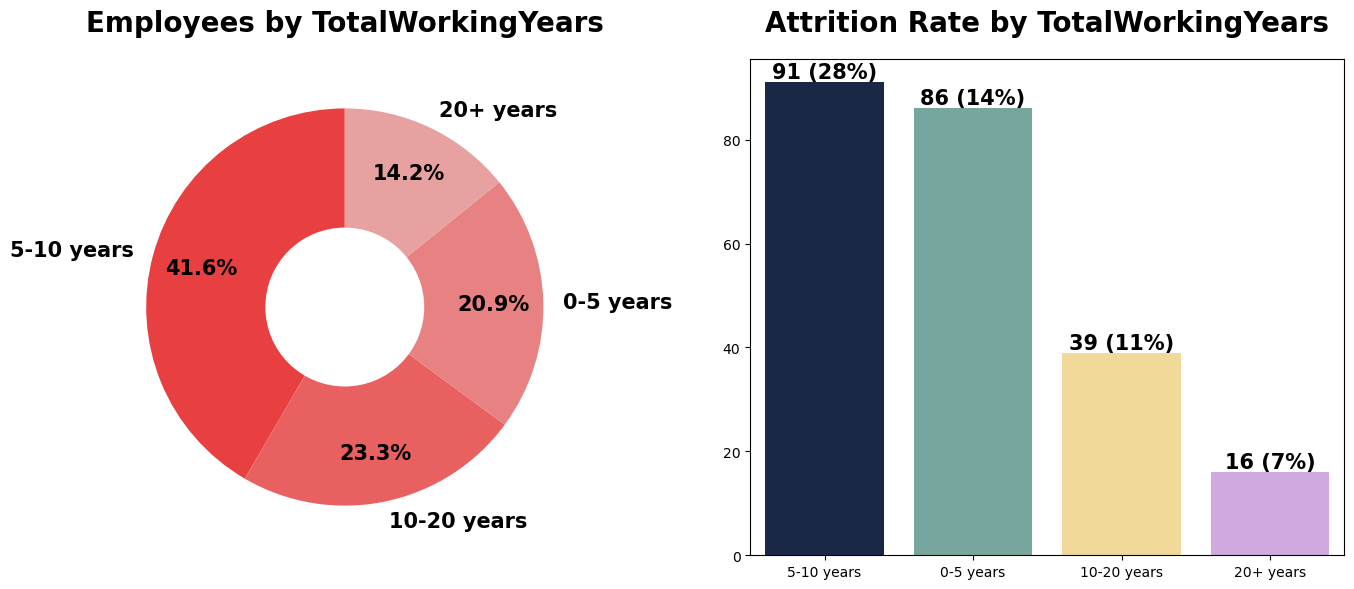

In [37]:
#Visualization to show Total Employees by TotalWorkingYearsGroup.

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
value_1 = df_attr["TotalWorkingYearsGroup"].value_counts()
plt.title("Employees by TotalWorkingYears", fontweight="black", size=20, pad=20)
plt.pie(value_1.values, labels=value_1.index, autopct="%.1f%%",pctdistance=0.75,startangle=90,
        colors=['#E84040', '#E96060', '#E88181', '#E7A1A1'],textprops={"fontweight":"black","size":15})
center_circle = plt.Circle((0, 0), 0.4, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)
    
#Visualization to show Attrition Rate by TotalWorkingYearsGroup.
plt.subplot(1,2,2)
new_df = df_attr[df_attr["Attrition"]=="Yes"]
value_2 = new_df["TotalWorkingYearsGroup"].value_counts()
attrition_rate = np.floor((value_2/value_1)*100).values
sns.barplot(x=value_2.index.tolist(), y=value_2.values,palette=["#11264e","#6faea4","#FEE08B","#D4A1E7","#E7A1A1"])
plt.title("Attrition Rate by TotalWorkingYears",fontweight="black",size=20,pad=20)
for index,value in enumerate(value_2):
    plt.text(index,value,str(value)+" ("+str(int(attrition_rate[index]))+"%)",ha="center",va="bottom",
             size=15,fontweight="black")
plt.tight_layout()
plt.show()

Most of the employees are having a total of 5 to 10 years of working experience and their Attrition Rate is also very high.

Employee with working experience of less than 10 years are having High Attrition Rate.

Employee with working experience of more than 10 years are having Less Attrition Rate.

# LabelEncoding

In [42]:
from sklearn import preprocessing 



In [43]:
le=preprocessing.LabelEncoder()

In [51]:
df_attr.sample(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1384,34,No,Travel_Rarely,937,Sales,1,3,Marketing,1,1950,...,1,80,0,14,3,2,14,8,2,1
825,29,No,Travel_Rarely,718,Research & Development,8,1,Medical,1,1150,...,3,80,1,10,2,2,10,7,1,2
341,38,No,Travel_Rarely,343,Research & Development,15,2,Life Sciences,1,461,...,2,80,1,12,3,3,11,10,2,9
458,40,No,Non-Travel,1094,Sales,28,3,Other,1,615,...,3,80,1,20,2,3,1,0,0,1
570,52,No,Non-Travel,715,Research & Development,19,4,Medical,1,791,...,1,80,1,5,3,3,4,3,1,2


In [52]:
df_attr['Attrition']=le.fit_transform(df_attr['Attrition'])

In [53]:
df_attr['BusinessTravel']=le.fit_transform(df_attr['BusinessTravel'])

In [54]:
df_attr['Department']=le.fit_transform(df_attr['Department'])

In [55]:
df_attr['EducationField']=le.fit_transform(df_attr['EducationField'])

In [56]:
df_attr['Gender']=le.fit_transform(df_attr['Gender'])

In [57]:
df_attr['JobRole']=le.fit_transform(df_attr['JobRole'])

In [58]:
df_attr['MaritalStatus']=le.fit_transform(df_attr['MaritalStatus'])

In [59]:
df_attr['Over18']=le.fit_transform(df_attr['Over18'])

In [60]:
df_attr['OverTime']=le.fit_transform(df_attr['OverTime'])

We have encoded all the columns so let's see the results.

In [61]:
df_attr.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,...,4,80,1,6,3,3,2,2,2,2


# Data Correlation

In [62]:
dfcor=df_attr.corr()
dfcor

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159205,0.024751,0.010661,-0.031882,-0.001686,0.208034,-0.040873,NaN,-0.010145,...,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
Attrition,-0.159205,1.000000,0.000074,-0.056652,0.063991,0.077924,-0.031373,0.026846,NaN,-0.010577,...,-0.045872,NaN,-0.137145,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199
BusinessTravel,0.024751,0.000074,1.000000,-0.004086,-0.009044,-0.024469,0.000757,0.023724,NaN,-0.015578,...,-0.035986,NaN,-0.016727,0.034226,0.015240,-0.011256,-0.014575,-0.011497,-0.032591,-0.022636
DailyRate,0.010661,-0.056652,-0.004086,1.000000,0.007109,-0.004985,-0.016806,0.037709,NaN,-0.050990,...,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
Department,-0.031882,0.063991,-0.009044,0.007109,1.000000,0.017225,0.007996,0.013720,NaN,-0.010895,...,-0.022414,NaN,-0.012193,-0.015762,0.036875,0.026383,0.022920,0.056315,0.040061,0.034282
DistanceFromHome,-0.001686,0.077924,-0.024469,-0.004985,0.017225,1.000000,0.021042,0.002013,NaN,0.032916,...,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.031373,0.000757,-0.016806,0.007996,0.021042,1.000000,-0.039592,NaN,0.042070,...,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EducationField,-0.040873,0.026846,0.023724,0.037709,0.013720,0.002013,-0.039592,1.000000,NaN,-0.002516,...,-0.004378,NaN,-0.016185,-0.027848,0.049195,0.041191,-0.018692,-0.010506,0.002326,-0.004130
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.010577,-0.015578,-0.050990,-0.010895,0.032916,0.042070,-0.002516,NaN,1.000000,...,-0.069861,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197


# Separating independent variable and target variable

In [63]:
x1=df_attr.drop('Attrition',axis=1)
y1=df_attr['Attrition']

In [64]:
x1.skew()

Age                         0.413286
BusinessTravel             -1.439006
DailyRate                  -0.003519
Department                  0.172231
DistanceFromHome            0.958118
Education                  -0.289681
EducationField              0.550371
EmployeeCount               0.000000
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
Gender                     -0.408665
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobRole                    -0.357270
JobSatisfaction            -0.329672
MaritalStatus              -0.152175
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
Over18                      0.000000
OverTime                    0.964489
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StandardHours               0.000000
StockOptionLevel            0.968980
T

In [65]:
from sklearn.preprocessing import power_transform
df_new=power_transform(x1)
df_new=pd.DataFrame(df_new,columns=x1.columns)

In [66]:
df_new.skew()

Age                        -0.007603
BusinessTravel             -0.970506
DailyRate                  -0.196160
Department                  0.013801
DistanceFromHome           -0.007468
Education                  -0.099881
EducationField             -0.008386
EmployeeCount               0.000000
EmployeeNumber             -0.288025
EnvironmentSatisfaction    -0.205395
Gender                     -0.408665
HourlyRate                 -0.106461
JobInvolvement             -0.020365
JobLevel                    0.103624
JobRole                    -0.319659
JobSatisfaction            -0.212815
MaritalStatus              -0.156911
MonthlyIncome               0.000000
MonthlyRate                -0.184087
NumCompaniesWorked          0.014814
Over18                      0.000000
OverTime                    0.964489
PercentSalaryHike           0.116250
PerformanceRating           0.000000
RelationshipSatisfaction   -0.193634
StandardHours               0.000000
StockOptionLevel            0.087019
T

So we have removed all skewness

# Handling class imbalance problem by using oversampling the minority class

In [67]:
! pip install imblearn

     -------------------------------------- 235.6/235.6 kB 4.8 MB/s eta 0:00:00
     -------------------------------------- 302.2/302.2 kB 9.1 MB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0


In [68]:
from imblearn.over_sampling import SMOTE

In [69]:
SM=SMOTE()
x_over,y_over=SM.fit_resample(x1,y1)

In [70]:
y_over.value_counts()

1    1233
0    1233
Name: Attrition, dtype: int64

# Creating train test split

In [71]:
x=x_over
x.shape

(2466, 34)

In [72]:
y=y_over
y.shape

(2466,)

In [73]:
y=y.values.reshape(-1,1)

In [74]:
y.shape

(2466, 1)

In [75]:
from sklearn.model_selection import train_test_split

In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [77]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=42)

In [78]:
x_train.shape

(1726, 34)

In [79]:
x_test.shape

(740, 34)

In [80]:
y_train.shape

(1726, 1)

In [81]:
y_test.shape

(740, 1)

# To Find Best Algorithm using multiple models.

In [100]:
lg=LogisticRegression()
dtc=DecisionTreeClassifier()
knn=KNeighborsClassifier()
gnb=GaussianNB()
rf=RandomForestClassifier()
ad=AdaBoostClassifier()
svc=SVC()

In [101]:
model=[lg,dtc,knn,gnb,rf,ad,svc]

for m in model:
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    print('accuracy_score:',m)
    print(accuracy_score(y_test,pred))
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))

accuracy_score: LogisticRegression()
0.6878378378378378
[[251 118]
 [113 258]]
              precision    recall  f1-score   support

           0       0.69      0.68      0.68       369
           1       0.69      0.70      0.69       371

    accuracy                           0.69       740
   macro avg       0.69      0.69      0.69       740
weighted avg       0.69      0.69      0.69       740

accuracy_score: DecisionTreeClassifier()
0.8013513513513514
[[293  76]
 [ 71 300]]
              precision    recall  f1-score   support

           0       0.80      0.79      0.80       369
           1       0.80      0.81      0.80       371

    accuracy                           0.80       740
   macro avg       0.80      0.80      0.80       740
weighted avg       0.80      0.80      0.80       740

accuracy_score: KNeighborsClassifier()
0.7283783783783784
[[211 158]
 [ 43 328]]
              precision    recall  f1-score   support

           0       0.83      0.57      0.68     

The RandomForestClassifier model best fits for this .

# Predict data using random forest classifier

In [94]:
model1 = RandomForestClassifier().fit(x_train, y_train)

In [95]:
predictions = model1.predict(x_test)

In [96]:
pred_df = pd.DataFrame(index=x_test.index)

In [97]:
pred_df['Attrition'] = predictions
pred_df.head()

,Attrition
1078,0
1281,0
621,0
1508,1
1975,1


# Cross Validation

In [102]:
from sklearn.model_selection import cross_val_score

In [103]:
for m in model:
    score=cross_val_score(m,x,y,cv=5)
    print('score:',m)
    print(score)
    print(score.mean())

score: LogisticRegression()
[0.49797571 0.62677485 0.65720081 0.67139959 0.52129817]
0.5949298272987822
score: DecisionTreeClassifier()
[0.63765182 0.81541582 0.79716024 0.79107505 0.52941176]
0.7141429404373784
score: KNeighborsClassifier()
[0.70445344 0.71602434 0.71399594 0.75456389 0.72819473]
0.7234464691921721
score: GaussianNB()
[0.61740891 0.73427992 0.71602434 0.7464503  0.73833671]
0.7105000369546116
score: RandomForestClassifier()
[0.70850202 0.94320487 0.92292089 0.92494929 0.64503043]
0.8289215001929853
score: AdaBoostClassifier()
[0.23481781 0.7484787  0.67342799 0.6653144  0.45436105]
0.5552799927733204
score: SVC()
[0.53441296 0.60446247 0.5821501  0.60649087 0.54969574]
0.5754424288213121


we have least difference in cross validation and accuracy is in knn model.

# Hyper Parameter Tunning

In [104]:
from sklearn.model_selection import GridSearchCV

In [105]:
grid_param={'criterion':['gini','entropy']}
gd_sr=GridSearchCV(estimator=dtc,
                 param_grid=grid_param,
                 scoring='accuracy',cv=5)
gd_sr.fit(x_train,y_train)
best_parameters=gd_sr.best_params_
print(best_parameters)
best_result=gd_sr.best_score_
print(best_result)

{'criterion': 'gini'}
0.8105386613051856


In [106]:
dtc=DecisionTreeClassifier(criterion='entropy')
dtc.fit(x1,y1)
dtc.score(x1,y1)

1.0

In [107]:
grid_params_={'n_neighbors':np.arange(1,12,2),
             'weights':['uniform','distance']}
gscv=GridSearchCV(knn,grid_params_,cv=5)
gscv.fit(x1,y1)

best_parameters=gscv.best_params_
print(best_parameters)

{'n_neighbors': 9, 'weights': 'distance'}


In [108]:
knn=KNeighborsClassifier(weights='distance')
knn.fit(x1,y1)
knn.score(x1,y1)

1.0

So we are getting best accuracy with knn classifier 

# Save the Model

In [110]:
import joblib

joblib.dump(knn,'knnfile.obj')

knn_from_joblib=joblib.load('knnfile.obj')